In [ ]:
import os
os.getcwd()

In [3]:
import re, string, unicodedata
import nltk
import contractions
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from contractions import contractions_dict

In [1]:
def expand_contractions(text):
    contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())),flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contractions_dict.get(match)\
                        if contractions_dict.get(match)\
                        else contractions_dict.get(match.lower())
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
    
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

In [8]:
sample = expand_contractions('')
sample

''

In [4]:
try:
    from collections import OrderedDict
except ImportError:
    from ordereddict import OrderedDict
    
import pandas as pd

# Array
import numpy as np

# Decompress the file
import gzip

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline

# Datetime
from datetime import datetime

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

# Large dataset
import dask.bag as db
Cleanreview_df = pd.read_csv('Cleanreview_VideoGames.csv' )


In [2]:
Cleanreview_df.head()

,Rating,ReviewerID,ProductID,ReviewerName,ProductDescription,Price,Categories,ReviewText,RatingClass,ReviewDate,CleanText
0,5,A1HP7NVNPFMA4N,0700026657,Ambrosia075,"Anno 2070, the newest version of the award-win...",39.99,"[['Video Games', 'PC', 'Games']]",but when you do it's great. This game is a bit...,positive,2015-10-17,great game bite hard get hang great
1,4,A1JGAP0185YJI6,0700026657,travis,"Anno 2070, the newest version of the award-win...",39.99,"[['Video Games', 'PC', 'Games']]","But in spite of that it was fun, I liked it I ...",positive,2015-07-27,spite fun like play alright steam bite trouble...
2,3,A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,"Anno 2070, the newest version of the award-win...",39.99,"[['Video Games', 'PC', 'Games']]",Three Stars ok game.,positive,2015-02-23,three star ok game
3,2,A2204E1TH211HT,0700026657,Grandma KR,"Anno 2070, the newest version of the award-win...",39.99,"[['Video Games', 'PC', 'Games']]",Two Stars found the game a bit too complicated...,negative,2015-02-20,two star find game bite complicate not expect ...
4,5,A2RF5B5H74JLPE,0700026657,jon,"Anno 2070, the newest version of the award-win...",39.99,"[['Video Games', 'PC', 'Games']]","love this game great game, I love it and have ...",positive,2014-12-25,love game great game love play since arrive


In [12]:
Cleanreview_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497240 entries, 0 to 497239
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Rating              497240 non-null  int64         
 1   ReviewerID          497240 non-null  object        
 2   ProductID           497240 non-null  object        
 3   ReviewerName        497131 non-null  object        
 4   ProductDescription  287372 non-null  object        
 5   Price               356582 non-null  float64       
 6   Categories          359654 non-null  object        
 7   ReviewText          497240 non-null  object        
 8   RatingClass         497240 non-null  object        
 9   ReviewDate          497240 non-null  datetime64[ns]
 10  CleanText           497187 non-null  object        
 11  ReviewYear          497240 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 45.5+ MB


In [5]:
#df['date'].dt.year
Cleanreview_df['ReviewDate'] = pd.to_datetime(Cleanreview_df['ReviewDate'])

Cleanreview_df['ReviewYear'] = Cleanreview_df['ReviewDate'].dt.year
Cleanreview_df.head()


,Rating,ReviewerID,ProductID,ReviewerName,ProductDescription,Price,Categories,ReviewText,RatingClass,ReviewDate,CleanText,ReviewYear
0,5,A1HP7NVNPFMA4N,0700026657,Ambrosia075,"Anno 2070, the newest version of the award-win...",39.99,"[['Video Games', 'PC', 'Games']]",but when you do it's great. This game is a bit...,positive,2015-10-17,great game bite hard get hang great,2015
1,4,A1JGAP0185YJI6,0700026657,travis,"Anno 2070, the newest version of the award-win...",39.99,"[['Video Games', 'PC', 'Games']]","But in spite of that it was fun, I liked it I ...",positive,2015-07-27,spite fun like play alright steam bite trouble...,2015
2,3,A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,"Anno 2070, the newest version of the award-win...",39.99,"[['Video Games', 'PC', 'Games']]",Three Stars ok game.,positive,2015-02-23,three star ok game,2015
3,2,A2204E1TH211HT,0700026657,Grandma KR,"Anno 2070, the newest version of the award-win...",39.99,"[['Video Games', 'PC', 'Games']]",Two Stars found the game a bit too complicated...,negative,2015-02-20,two star find game bite complicate not expect ...,2015
4,5,A2RF5B5H74JLPE,0700026657,jon,"Anno 2070, the newest version of the award-win...",39.99,"[['Video Games', 'PC', 'Games']]","love this game great game, I love it and have ...",positive,2014-12-25,love game great game love play since arrive,2014


In [24]:
 classCounts=Cleanreview_df.groupby(['Rating','ReviewYear']).size()
print(classCounts)


#class_counts
class_counts.to_csv('ReviewRatingClass.csv')


Rating  ReviewYear
1       1999              3
        2000             99
        2001            260
        2002            394
        2003            326
                      ...  
5       2014          47867
        2015          62012
        2016          51143
        2017          26678
        2018           7942
Length: 100, dtype: int64


In [15]:
rows=[3,4]
column=['ReviewText','CleanText','RatingClass']
Cleanreview_df.loc[rows,column]

,ReviewText,CleanText,RatingClass
3,Two Stars found the game a bit too complicated...,two star find game bite complicate not expect ...,negative
4,"love this game great game, I love it and have ...",love game great game love play since arrive,positive


In [8]:
#df = pd.DataFrame({'col':np.random.randn(12000), 'target':np.random.randint(low = 0, high = 2, size=12000)})
#new_df = df.groupby('target').apply(lambda x: x.sample(n=5000)).reset_index(drop = True)

Balanced2014Review= pd.DataFrame({'ReviewerID':np.random.randn(15000), 'Rating':np.random.randint(low = 1, high = 5, size=15000)})

Balanced2014Review.groupby(['Rating']).size()
Balanced2014Review.head()

,ReviewerID,Rating
0,0.712774,3
1,0.868777,1
2,0.297237,1
3,0.091346,1
4,0.018274,4


In [11]:
pip install imblearn

     |████████████████████████████████| 206 kB 5.6 MB/s eta 0:00:01
     |████████████████████████████████| 22.3 MB 10.2 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
Note: you may need to restart the kernel to use updated packages.


In [26]:
Cleanreview_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497240 entries, 0 to 497239
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Rating              497240 non-null  int64         
 1   ReviewerID          497240 non-null  object        
 2   ProductID           497240 non-null  object        
 3   ReviewerName        497131 non-null  object        
 4   ProductDescription  287372 non-null  object        
 5   Price               356582 non-null  float64       
 6   Categories          359654 non-null  object        
 7   ReviewText          497240 non-null  object        
 8   RatingClass         497240 non-null  object        
 9   ReviewDate          497240 non-null  datetime64[ns]
 10  CleanText           497187 non-null  object        
 11  ReviewYear          497240 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 45.5+ MB


In [6]:
Cleanreview_df.isnull().sum()

Cleanreview_df=Cleanreview_df.dropna(subset=['CleanText'])

In [7]:
Cleanreview_df.isnull().sum()

Rating                     0
ReviewerID                 0
ProductID                  0
ReviewerName             109
ProductDescription    209843
Price                 140639
Categories            137567
ReviewText                 0
RatingClass                0
ReviewDate                 0
CleanText                  0
ReviewYear                 0
dtype: int64

In [12]:

pip install xgboost

     |████████████████████████████████| 157.5 MB 43 kB/s s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [8]:
#sampling with SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from catboost import CatBoostClassifier, Pool
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from  sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from gensim.models import Word2Vec
from tqdm import tqdm
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier
# define the dataset location

X = Cleanreview_df['CleanText']
y = Cleanreview_df['Rating']


from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(X)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(X, y,train_size=3000,
                                                  test_size = 1000,
                                                  random_state=12)

'''
from imblearn.over_sampling import SMOTE 
sm = SMOTE(k_neighbors=1, random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X, df.labels) 
'''

sm = SMOTE(random_state=12)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)


In [9]:
x_test_res, y_test_res = sm.fit_resample(x_val, y_val)

In [28]:
#Verifying oversampling 
y_test_res.value_counts()
y_train_res.value_counts()

5    1818
4    1818
3    1818
2    1818
1    1818
Name: Rating, dtype: int64

In [40]:
pip install itertools

ERROR: Could not find a version that satisfies the requirement itertools (from versions: none)
ERROR: No matching distribution found for itertools
Note: you may need to restart the kernel to use updated packages.


In [10]:
#Modelling
import itertools
# Confusion Matrix function
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.ocean):
    """
    Create a confusion matrix plot for 'good' and 'bad' rating values 
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title, fontsize = 20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize = 20)
    plt.yticks(tick_marks, classes, fontsize = 20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment = "center", 
                 color = "white" if cm[i, j] < thresh else "black", fontsize = 40)
    
    plt.tight_layout()
    plt.ylabel('True Label', fontsize = 30)
    plt.xlabel('Predicted Label', fontsize = 30)

    return plt

In [11]:
def disp_confusion_matrix(y_pred, model_name, vector = 'CounterVectorizing'):
    """
    Display confusion matrix for selected model with countVectorizer
    """
    cm = confusion_matrix(y_test_res, predictions)
    fig = plt.figure(figsize=(10, 10))
    plot = plot_confusion_matrix(cm, classes=[1,2,3,4,5], normalize=False, 
                                 title = model_name + " " + 'with' + " " + vector + " "+ '\nConfusion Matrix')
    plt.show()

In [12]:
def modeling(Model, Xtrain = x_train_res, Xtest = x_test_res):
    """
    This function apply countVectorizer with machine learning algorithms. 
    """
    
    # Instantiate the classifier: model
    model = Model
    
    # Fitting classifier to the Training set (all features)
    model.fit(Xtrain, y_train)
    
    global y_pred
    # Predicting the Test set results
    y_pred = model.predict(Xtest)
    
    # Assign f1 score to a variable
    score = f1_score(y_test, y_pred, average = 'weighted')
    
    # Printing evaluation metric (f1-score) 
    print("f1 score: {}".format(score))

In [29]:
#Function call for Logistic Regression

logisticRegr = LogisticRegression()

logisticRegr.fit(x_train_res, y_train_res)

predictions = logisticRegr.predict(x_test_res)

In [30]:
score = logisticRegr.score(x_test_res, y_test_res)
#score = f1_score(y_test_res, predictions, average = 'weighted')
print(score)

0.5154605263157894


In [31]:
print(classification_report(y_test_res, predictions))

              precision    recall  f1-score   support

           1       0.80      0.53      0.64       608
           2       0.60      0.21      0.31       608
           3       0.39      0.50      0.43       608
           4       0.43      0.53      0.47       608
           5       0.56      0.81      0.66       608

    accuracy                           0.52      3040
   macro avg       0.55      0.52      0.50      3040
weighted avg       0.55      0.52      0.50      3040



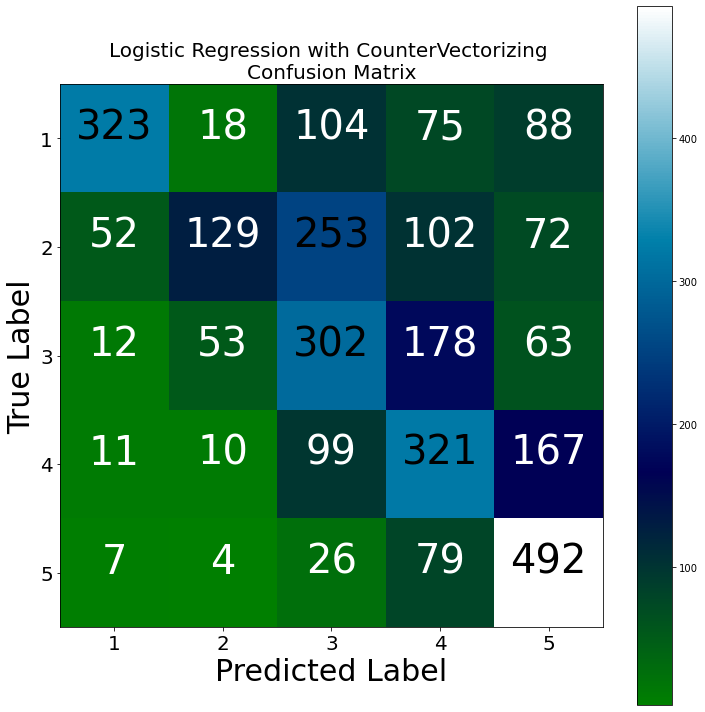

In [43]:
disp_confusion_matrix(predictions, "Logistic Regression")

In [ ]:
#Modelling using Naive Bayes
model=GaussianNB()
x_train_res=x_train_res.toarray()
model.fit(x_train_res, y_train_res)

predictions = model.predict(x_test_res)

In [13]:
# Fuction to compute alpha value
def naive_bayes(X_train, y_train):
    
    alpha_values = np.arange(1, 500, 0.5)
        

    # empty list that will hold cv scores
    cv_scores = []

    # perform 10-fold cross validation
    for alpha in alpha_values:
        mnb = MultinomialNB(alpha = alpha)
        scores = cross_val_score(mnb, X_train, y_train, cv = 10, scoring = 'accuracy')
        cv_scores.append(scores.mean())

    # changing to misclassification error
    MSE = [1 - x for x in cv_scores]

    # determining best alpha
    optimal_alpha = alpha_values[MSE.index(min(MSE))]
    print('\nThe optimal number of alpha is %d.' % optimal_alpha)

    # plot misclassification error vs alpha
    plt.plot(alpha_values, MSE, marker = '*') 

    #for xy in zip(alpha_values, np.round(MSE,3)):
        #plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
    plt.title("Misclassification Error vs alpha")
    plt.xlabel('value of alpha')
    plt.ylabel('Misclassification Error')
    plt.show()

    #print("the misclassification error for each value of alpha is : ", np.round(MSE,3))
    return optimal_alpha



The optimal number of alpha is 1.


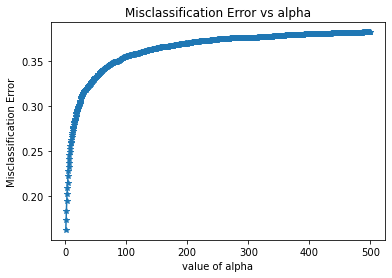

In [14]:
optimal_alpha_bow = naive_bayes(x_train_res, y_train_res)

In [15]:
# instantiate learning model alpha = optimal_alpha
nb_optimal =  MultinomialNB(alpha = optimal_alpha_bow)

# fitting the model
nb_optimal.fit(x_train_res, y_train_res)

# predict the response


In [19]:
predictions = nb_optimal.predict(x_test_res)

In [20]:
print(classification_report(y_test_res, predictions))

              precision    recall  f1-score   support

           1       0.77      0.26      0.39       608
           2       0.28      0.05      0.08       608
           3       0.27      0.87      0.42       608
           4       0.43      0.39      0.41       608
           5       0.95      0.38      0.55       608

    accuracy                           0.39      3040
   macro avg       0.54      0.39      0.37      3040
weighted avg       0.54      0.39      0.37      3040



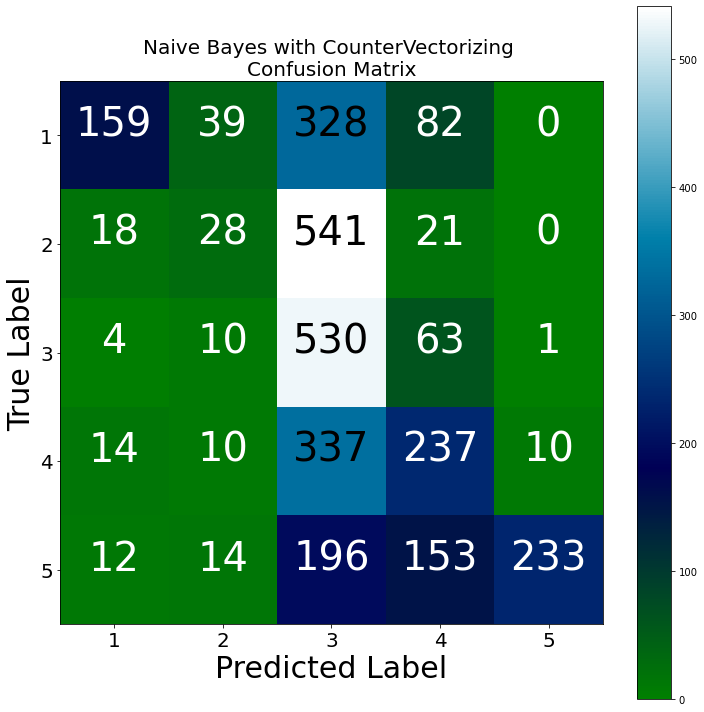

In [21]:
disp_confusion_matrix(predictions, "Naive Bayes")